# Start of PCA

In [1]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/actReading_11.csv')


In [2]:
# Dropping the other labels, ID column
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_diff', 'is_proficient'])


In [3]:
one_hot_encoded_df2.head()

,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,0.888889,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,0.888889,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [4]:
one_hot_encoded_df2.columns.tolist()

['proficient_score',
 'course_ACT Review',
 'course_ACT/WK Rev.',
 'course_ACTReview.5C',
 'course_AG Communica',
 'course_AIDE-ELEM',
 'course_AIDE-LIB',
 'course_ALG I B ACCE',
 'course_ALIITRIGH/A',
 'course_ARMY LET I',
 'course_ARMY LET II',
 'course_ARMY LET III',
 'course_ARMY LET IV',
 'course_ARMYLETIVACT',
 'course_AcAdv.Baseba',
 'course_AcAdv.Basket',
 'course_AcAdv.CrossC',
 'course_AcAdv.Footb',
 'course_AcAdv.Softba',
 'course_AcAdv.Volley',
 'course_Accounting',
 'course_Adv BTA',
 'course_Advanced Agr',
 'course_Agriscience',
 'course_Alg Esntls B',
 'course_Alg II/Trig',
 'course_AlgEnrichmet',
 'course_AlgII/TrigAC',
 'course_Algebra I',
 'course_Algebra I A',
 'course_Algebra I B',
 'course_Algebra II',
 'course_AlgebraicCon',
 'course_Anat/Physio',
 'course_Anthropology',
 'course_Art App',
 'course_BAND MARCH',
 'course_BANDCONCERT',
 'course_BANDMARCHAUX',
 'course_BIOLOGY ADV',
 'course_Bak & Pstr A',
 'course_BandConcer.5',
 'course_BandConcer1C',
 'course_Band

# Start of Modeling

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np


In [6]:
X = one_hot_encoded_df2.drop('proficient_score', axis=1)
y = one_hot_encoded_df2['proficient_score']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Cross-Validated MSE: 0.06
[0]	train-rmse:0.30907	eval-rmse:0.30600
[1]	train-rmse:0.30109	eval-rmse:0.29938
[2]	train-rmse:0.29403	eval-rmse:0.29381
[3]	train-rmse:0.28831	eval-rmse:0.28886
[4]	train-rmse:0.28309	eval-rmse:0.28438
[5]	train-rmse:0.27876	eval-rmse:0.28056
[6]	train-rmse:0.27377	eval-rmse:0.27682
[7]	train-rmse:0.26977	eval-rmse:0.27396
[8]	train-rmse:0.26619	eval-rmse:0.27171
[9]	train-rmse:0.26270	eval-rmse:0.26912
[10]	train-rmse:0.25996	eval-rmse:0.26726
[11]	train-rmse:0.25761	eval-rmse:0.26540
[12]	train-rmse:0.25567	eval-rmse:0.26312
[13]	train-rmse:0.25408	eval-rmse:0.26205
[14]	train-rmse:0.25284	eval-rmse:0.26115
[15]	train-rmse:0.25155	eval-rmse:0.25987
[16]	train-rmse:0.25005	eval-rmse:0.25815
[17]	train-rmse:0.24902	eval-rmse:0.25740
[18]	train-rmse:0.24798	eval-rmse:0.25656
[19]	train-rmse:0.24680	eval-rmse:0.25579
[20]	train-rmse:0.24573	eval-rmse:0.25487
[21]	train-rmse:0.24501	eval-rmse:0.25423
[22]	train-rmse:0.24433	eval-rmse:0.25366
[23]	train-rmse:0.

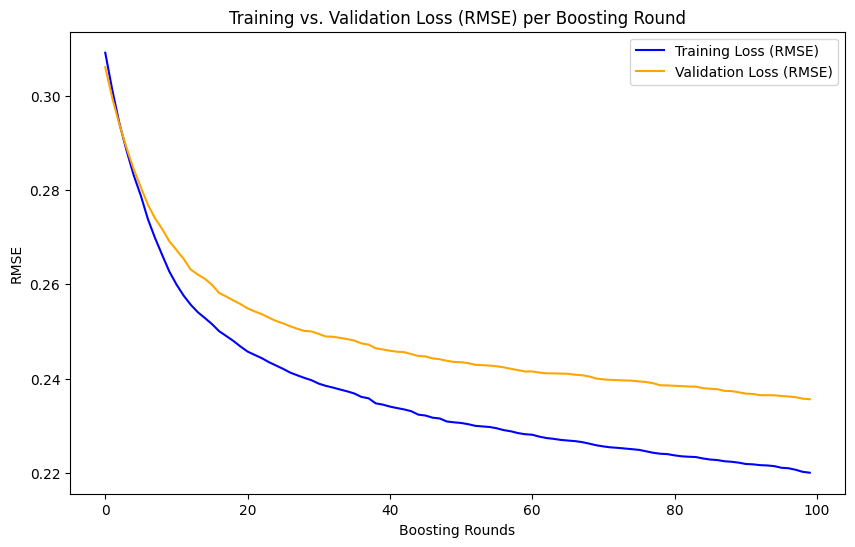

XGBoost - MSE: 0.06, R²: 0.44, RMSE: 0.24


In [8]:
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize the XGBRegressor with additional regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6, #this affects the r2 th emost
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping, tracking both training and validation losses
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract train and eval loss from evals_result
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred = xgb_model_trained.predict(dtest)

# Evaluate the model's performance on the test set
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


Note that without PCA, R2 and RMSE values are lower and higher respectively

## feature importances and correlations

In [9]:
import pandas as pd

# Calculate feature importance
feature_importances = xgb_model_trained.get_score(importance_type='weight')

# Convert feature importance into a DataFrame
importance_df = pd.DataFrame(
    list(feature_importances.items()),
    columns=['Feature', 'Importance']
)

# Calculate correlation of each feature with the label
correlations = []
for feature in importance_df['Feature']:
    if feature in X.columns:  # Ensure the feature exists in the original dataset
        corr = X[feature].corr(y)  # Pearson correlation
        correlations.append(corr)
    else:
        correlations.append(None)  # Handle cases where feature names mismatch (if any)

# Add correlation to the DataFrame
importance_df['Correlation'] = correlations

# Add positive/negative correlation indication
importance_df['Correlation_Sign'] = importance_df['Correlation'].apply(
    lambda x: 'Positive' if x > 0.1 else 'Negative' if x < -0.1 else 'Neutral'
)

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df[importance_df['Importance'] > 30].reset_index()



,index,Feature,Importance,Correlation,Correlation_Sign
0,24,course_Algebra I B,60.0,-0.223613,Negative
1,54,course_D&TSafetyEd,58.0,0.106656,Positive
2,45,course_CareerPrep-B,56.0,0.070884,Neutral
3,136,course_Spanish 1,49.0,0.132286,Positive
4,21,course_Alg II/Trig,43.0,0.338632,Positive
5,102,course_LIFE PE 9-12,35.0,-0.104507,Negative
6,74,course_Food Nutritn,33.0,0.000625,Neutral
7,61,course_Eng Gr10 Adv,31.0,0.439090,Positive
8,161,course_VarFBII,31.0,-0.050020,Neutral
9,19,course_Agriscience,31.0,-0.090608,Neutral


In [10]:
importance_df[importance_df['Correlation'] > 0.1]

,Feature,Importance,Correlation,Correlation_Sign
54,course_D&TSafetyEd,58.0,0.106656,Positive
136,course_Spanish 1,49.0,0.132286,Positive
21,course_Alg II/Trig,43.0,0.338632,Positive
61,course_Eng Gr10 Adv,31.0,0.439090,Positive
6,course_ALIITRIGH/A,29.0,0.206996,Positive
152,course_USHis I Adv,29.0,0.333337,Positive
47,course_ChemistryAdv,22.0,0.446350,Positive
86,course_HISTUS1877AC,16.0,0.167306,Positive
126,course_Psychology,15.0,0.115457,Positive
137,course_Spanish 2,12.0,0.112569,Positive


In [11]:
importance_df[importance_df['Correlation'] < -0.1]

,Feature,Importance,Correlation,Correlation_Sign
24,course_Algebra I B,60.0,-0.223613,Negative
102,course_LIFE PE 9-12,35.0,-0.104507,Negative
121,course_Physical Sci,11.0,-0.230387,Negative
63,course_English Gr10,4.0,-0.229890,Negative
150,course_US His-1877,3.0,-0.135404,Negative
153,course_USHis I G10,1.0,-0.145412,Negative
